In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
clustering = pd.read_csv('./data/clusterdb_cluster.tsv', sep="\t", header=None)
taxid_mapping = pd.read_csv('./data/tax_mapping.tsv', sep="\t", header=None)

In [21]:
taxid_mapping.columns = ["seqid", "taxid"]

In [22]:
clusters = pd.merge(clustering, taxid_mapping, left_on=1, right_on="seqid")

In [23]:
clusters = clusters.set_index(0)
clusters = clusters.drop(1, axis=1)
clusters.index = clusters.index.rename('cluster')
clusters

,seqid,taxid
cluster,,
KAK0222395.1,KAK0222395.1,153910
KAK0222395.1,KAK0197673.1,47429
KAK0222402.1,KAK0222402.1,153910
KAK0222405.1,KAK0222405.1,153910
KAK0222405.1,KAK0221353.1,153910
...,...,...
KAK0477210.1,KAK0477210.1,153913
KAK0477210.1,KAK0499327.1,153913
KAK0477210.1,KAK0477713.1,153913


In [24]:
utax_count = clusters.groupby("cluster").nunique().sort_values('taxid', ascending=False)

In [25]:
utax_count

,seqid,taxid
cluster,,
PBK63318.1,28,9
KAK0456126.1,9,9
KAK0456040.1,9,9
KAK0224325.1,17,9
KAK0456089.1,17,9
...,...,...
KAK0474698.1,1,1
KAK0474699.1,1,1
KAK0474702.1,3,1


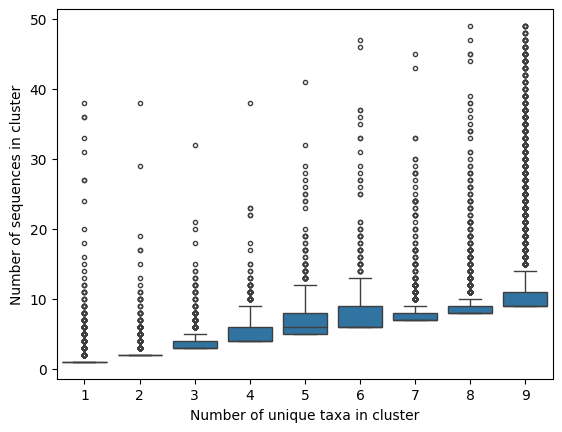

In [57]:
plot = sns.boxplot(
    data=utax_count[utax_count.seqid < 50],
    x="taxid",
    y="seqid",
    flierprops={"markersize": 3},
)
plot.set_xlabel("Number of unique taxa in cluster")
plot.set_ylabel("Number of sequences in cluster")
plot.figure.savefig("./figures/cluster_boxplot_subset.png", dpi=350)